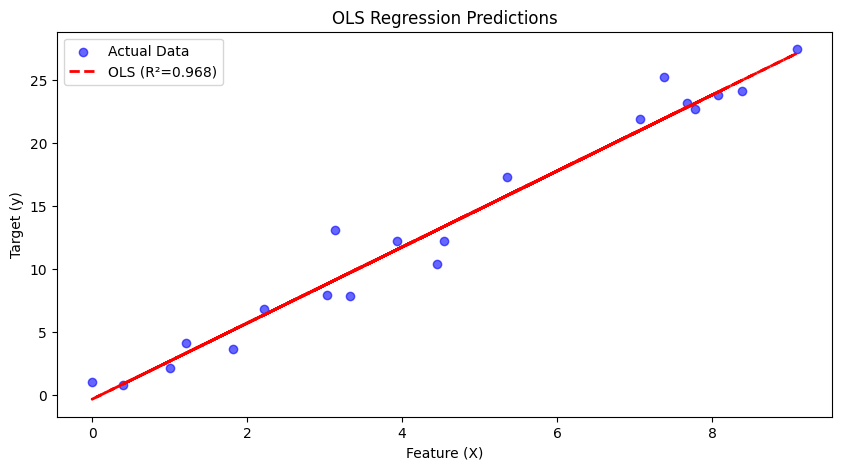

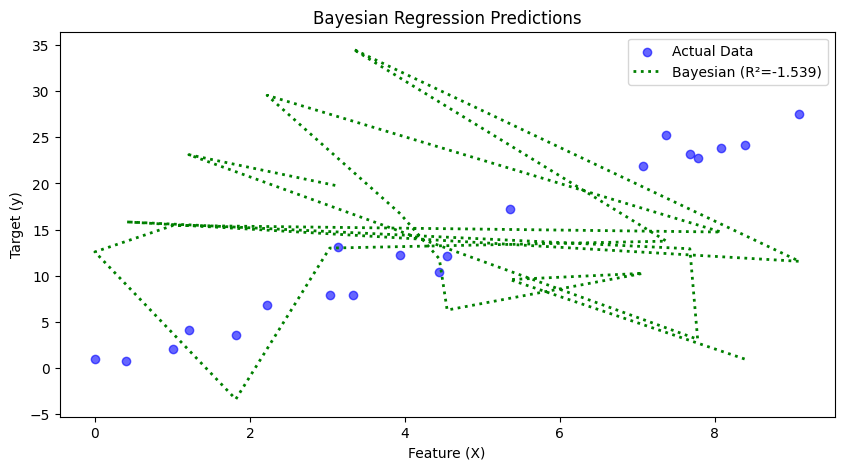

<ipython-input-1-8ab8a4c86b2c>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


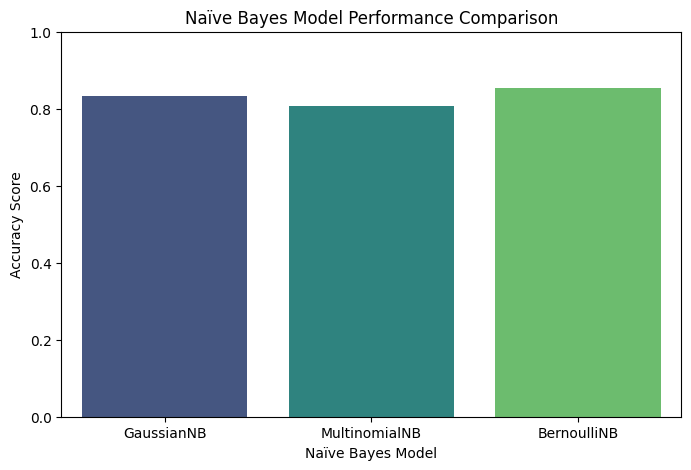

OLS Regression Metrics:
Mean Squared Error: 2.488, R² Score: 0.968

Bayesian Regression Metrics:
Mean Squared Error: 199.612, R² Score: -1.539

Naïve Bayes Classification Metrics:
GaussianNB Accuracy: 0.833
MultinomialNB Accuracy: 0.807 (Using MinMax Scaling)
BernoulliNB Accuracy: 0.853


In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Synthetic Data for Bayesian Regression
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.flatten() + np.random.normal(0, 2, 100)  # Linear relation with noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Ordinary Least Squares (OLS) Regression
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)

# Compute OLS Metrics
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

# Visualization: OLS Regression Predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_test, y_pred_ols, linestyle="dashed", color="red", linewidth=2, label=f"OLS (R²={r2_ols:.3f})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("OLS Regression Predictions")
plt.legend()
plt.show()

# Step 3: Bayesian Regression using SciPy
posterior_mean = np.mean(y_pred_ols)
posterior_std = np.std(y_pred_ols)

# Compute Bayesian Predictions
y_pred_bayesian = norm.rvs(loc=posterior_mean, scale=posterior_std, size=len(y_test))

# Compute Bayesian Regression Metrics
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

# Visualization: Bayesian Regression Predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_test, y_pred_bayesian, linestyle="dotted", color="green", linewidth=2, label=f"Bayesian (R²={r2_bayesian:.3f})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Bayesian Regression Predictions")
plt.legend()
plt.show()

# Step 4: Generate Synthetic Data for Naïve Bayes Classification
from sklearn.datasets import make_classification
X_class, y_class = make_classification(n_samples=500, n_features=6, random_state=42)

# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Apply Min-Max Scaling for MultinomialNB (convert negative values to [0,1] range)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_class)
X_test_scaled = scaler.transform(X_test_class)

# Step 5: Train Naïve Bayes Classifiers
gnb = GaussianNB()  # Continuous features
mnb = MultinomialNB()  # Categorical features (requires non-negative values)
bnb = BernoulliNB()  # Binary features

gnb.fit(X_train_class, y_train_class)
mnb.fit(X_train_scaled, y_train_class)  # Uses scaled data
bnb.fit(X_train_class, y_train_class)

# Predict using Naïve Bayes
y_pred_gnb = gnb.predict(X_test_class)
y_pred_mnb = mnb.predict(X_test_scaled)  # Uses scaled data
y_pred_bnb = bnb.predict(X_test_class)

# Compute Naïve Bayes Accuracy Scores
accuracy_gnb = accuracy_score(y_test_class, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test_class, y_pred_mnb)
accuracy_bnb = accuracy_score(y_test_class, y_pred_bnb)

# Visualization: Naïve Bayes Performance Comparison
plt.figure(figsize=(8, 5))
models = ["GaussianNB", "MultinomialNB", "BernoulliNB"]
accuracies = [accuracy_gnb, accuracy_mnb, accuracy_bnb]
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.xlabel("Naïve Bayes Model")
plt.ylabel("Accuracy Score")
plt.title("Naïve Bayes Model Performance Comparison")
plt.ylim(0, 1)
plt.show()

# Step 6: Print Model Performance Results
print("OLS Regression Metrics:")
print(f"Mean Squared Error: {mse_ols:.3f}, R² Score: {r2_ols:.3f}\n")

print("Bayesian Regression Metrics:")
print(f"Mean Squared Error: {mse_bayesian:.3f}, R² Score: {r2_bayesian:.3f}\n")

print("Naïve Bayes Classification Metrics:")
print(f"GaussianNB Accuracy: {accuracy_gnb:.3f}")
print(f"MultinomialNB Accuracy: {accuracy_mnb:.3f} (Using MinMax Scaling)")
print(f"BernoulliNB Accuracy: {accuracy_bnb:.3f}")
